In [1]:
import numpy as np
from toolkit import *
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data()

In [3]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((48000, 784),
 (48000, 10),
 (12000, 784),
 (12000, 10),
 (10000, 784),
 (10000, 10))

In [4]:
activation_fns = [relu, sigmoid]
activation_fns_prime = [relu_prime, sigmoid_prime]

In [6]:
for activation_fn, activation_fn_prime in zip(activation_fns, activation_fns_prime):
    for initialization in ['normal_init', 'zeros']:
        print(f"Activation Function: {activation_fn.__name__}, Initialization: {initialization}")
        model = NeuralNetwork(784, (28,28), [128], 10, activation_fn, activation_fn_prime, initialization, mse, mse_prime)
        model.fit(x_train, y_train, x_val, y_val, epochs=10, learning_rate=0.01, batch_size=128, early_stopping=True, patience=5, verbose=True)
        print(f"Accuracy: {model.score(x_test, y_test)}")
        save_model(model, f"model_{activation_fn.__name__}_{initialization}.pkl")

Activation Function: relu, Initialization: normal_init
Epoch: 0, Training Loss: 0.0003971413575768994, Validation Loss: 0.028186347158518525, Training Accuracy: 0.765625, Validation Accuracy: 0.807
Epoch: 1, Training Loss: 0.0005380968721514199, Validation Loss: 0.024801147860932172, Training Accuracy: 0.7890625, Validation Accuracy: 0.831
Epoch: 2, Training Loss: 0.00048514899289230816, Validation Loss: 0.023273336618320282, Training Accuracy: 0.8125, Validation Accuracy: 0.84075
Epoch: 3, Training Loss: 0.0004991538818096962, Validation Loss: 0.022315650293185545, Training Accuracy: 0.828125, Validation Accuracy: 0.8475
Epoch: 4, Training Loss: 0.0004871392979935544, Validation Loss: 0.021630778593297626, Training Accuracy: 0.8515625, Validation Accuracy: 0.8535
Epoch: 5, Training Loss: 0.0004475372904992398, Validation Loss: 0.021118536594118793, Training Accuracy: 0.8515625, Validation Accuracy: 0.8564166666666667
Epoch: 6, Training Loss: 0.0003381580520242989, Validation Loss: 0.0

In [7]:
# Load Relu Model
relu_zero_model = load_model("model_relu_zeros.pkl")
relu_normal_model = load_model("model_relu_normal_init.pkl")

# Load Sigmoid Model
sigmoid_zero_model = load_model("model_sigmoid_zeros.pkl")
sigmoid_normal_model = load_model("model_sigmoid_normal_init.pkl")

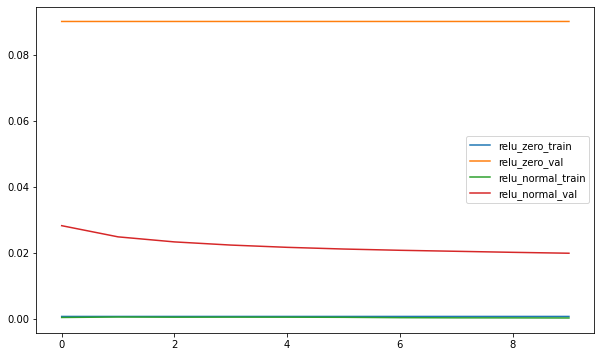

In [8]:
# Plot the training loss and validation loss for RELU
# fig size
plt.figure(figsize=(10, 6))
plt.plot(relu_zero_model.train_loss, label='relu_zero_train')
plt.plot(relu_zero_model.val_loss, label='relu_zero_val')
plt.plot(relu_normal_model.train_loss, label='relu_normal_train')
plt.plot(relu_normal_model.val_loss, label='relu_normal_val')
plt.legend()
plt.show()

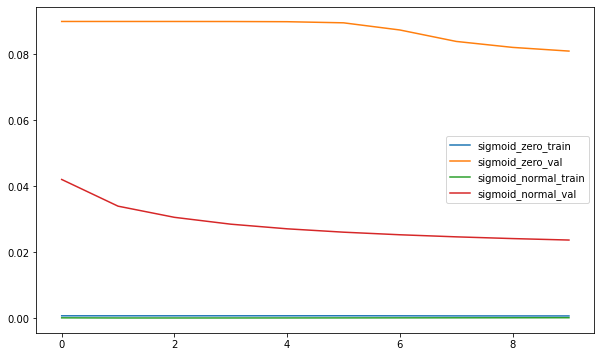

In [9]:
# Plot the training loss and validation loss for Sigmoid
# fig size
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_zero_model.train_loss, label='sigmoid_zero_train')
plt.plot(sigmoid_zero_model.val_loss, label='sigmoid_zero_val')
plt.plot(sigmoid_normal_model.train_loss, label='sigmoid_normal_train')
plt.plot(sigmoid_normal_model.val_loss, label='sigmoid_normal_val')
plt.legend()
plt.show()

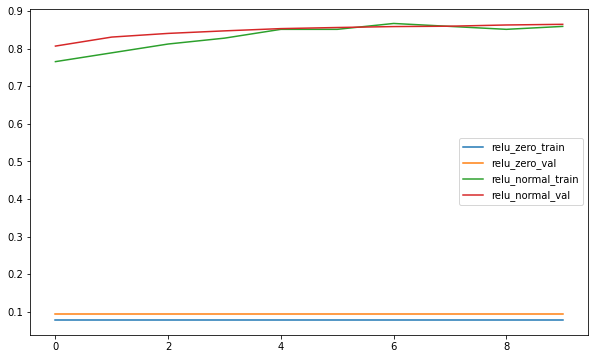

In [10]:
# Plot the training accuracy and validation accuracy for RELU
# fig size
plt.figure(figsize=(10, 6))
plt.plot(relu_zero_model.train_acc, label='relu_zero_train')
plt.plot(relu_zero_model.val_acc, label='relu_zero_val')
plt.plot(relu_normal_model.train_acc, label='relu_normal_train')
plt.plot(relu_normal_model.val_acc, label='relu_normal_val')
plt.legend()
plt.show()

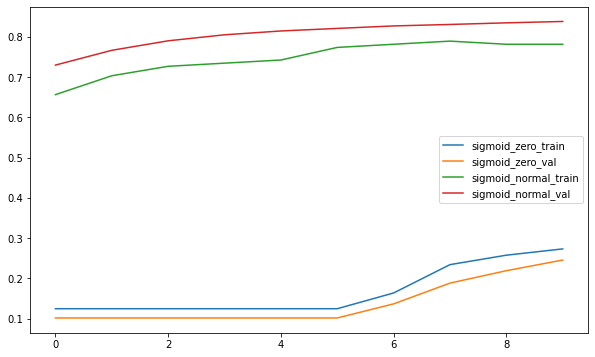

In [11]:
# Plot the training accuracy and validation accuracy for Sigmoid
# fig size
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_zero_model.train_acc, label='sigmoid_zero_train')
plt.plot(sigmoid_zero_model.val_acc, label='sigmoid_zero_val')
plt.plot(sigmoid_normal_model.train_acc, label='sigmoid_normal_train')
plt.plot(sigmoid_normal_model.val_acc, label='sigmoid_normal_val')
plt.legend()
plt.show()